In [1]:
FILENAME = 'data/EMTRouteLines.json'
import json,pandas
df = pandas.DataFrame(json.load(open(FILENAME))['resultValues'])

In [2]:
df.head()

,distance,distancePreviousStop,latitude,line,longitude,name,node,orderDetail,secDetail
0,0,0,40.438157,4,-3.638731,INTERCAMBIADOR CIUDAD LINEAL,1199,1,10
1,458,458,40.434865,4,-3.636101,HNOS.GARCIA NOBLEJAS-VITAL AZA,240,1,10
2,752,294,40.432523,4,-3.634476,HNOS.GARCIA NOBLEJAS-ASCAO,242,1,10
3,1153,401,40.429391,4,-3.632136,HNOS.GARCIA NOBLEJAS-LUIS CAMPOS,244,1,10
4,1371,218,40.427677,4,-3.630893,HNOS.GARCIA NOBLEJAS-CASTILLO DE AREVALO,246,1,10


In [3]:
df.describe()

,distance,distancePreviousStop,latitude,line,longitude,node,secDetail
count,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000
mean,4435.009700,334.297892,40.421358,148.839396,-3.677326,2089.285395,14.928185
std,3130.274799,306.451957,0.035228,165.816627,0.041566,1552.773070,4.999951
min,0.000000,0.000000,40.341219,4.000000,-3.797938,23.000000,10.000000
25%,1852.000000,218.000000,40.393664,43.000000,-3.703842,861.000000,10.000000
50%,4068.000000,289.000000,40.419602,105.000000,-3.680877,1788.000000,10.000000
75%,6533.000000,376.000000,40.449332,143.000000,-3.648886,3016.000000,20.000000
max,16263.000000,5929.000000,40.506706,717.000000,-3.569393,5518.000000,20.000000


In [4]:
%matplotlib inline

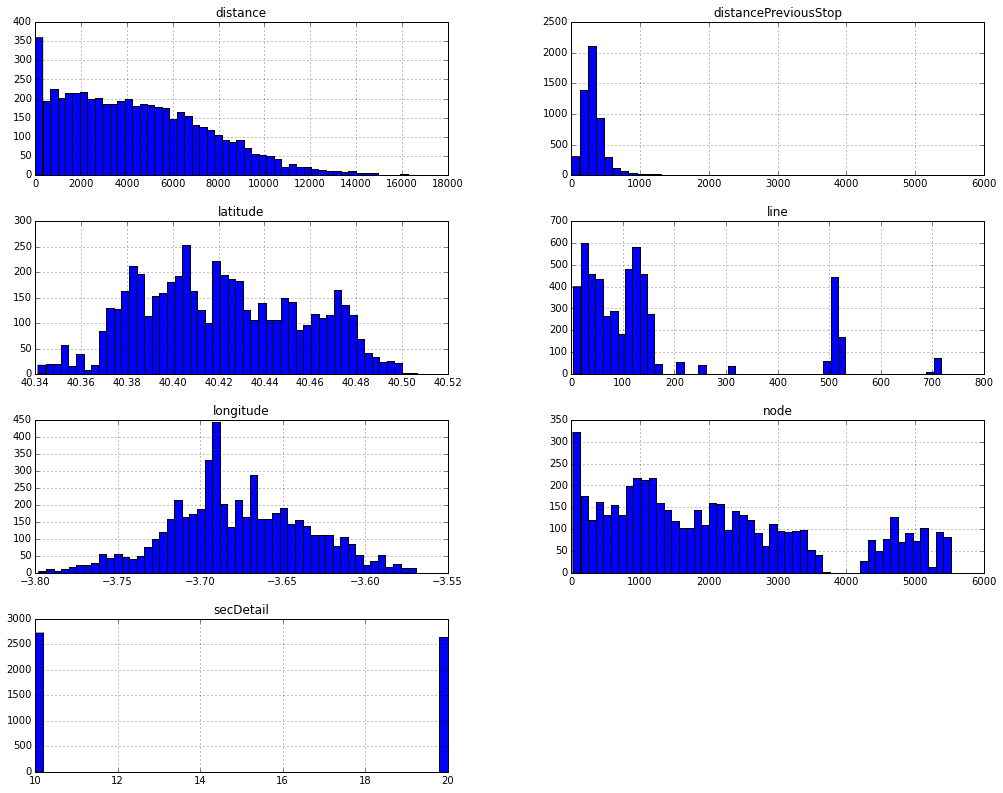

In [5]:
pandas.DataFrame.hist(df, bins=50, layout=(5,2), figsize=(17,17));

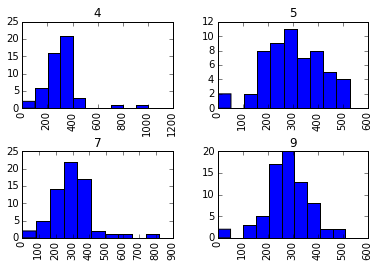

In [6]:
df.distancePreviousStop[df["line"]<10].hist(by=df["line"]);

In [7]:
len(df["line"].unique())

111

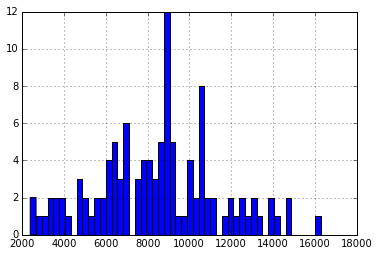

In [10]:
df["distance"].groupby(df["line"]).max().hist(bins=50);

In [11]:
FILENAME = 'data/EMTListLines.json'
df2 = pandas.DataFrame(json.load(open(FILENAME))['resultValues'])

In [12]:
df2.head()

,dateEnd,dateFirst,groupNumber,label,line,nameA,nameB
0,31/12/2999,21/11/2014,110,1,001,PLAZA DE CRISTO REY,PROSPERIDAD
1,31/12/2999,14/11/2014,110,2,002,PLAZA DE MANUEL BECERRA,AVENIDA DE REINA VICTORIA
2,31/12/2999,12/03/2015,110,3,003,PUERTA DE TOLEDO,PLAZA DE SAN AMARO
3,31/12/2999,30/01/2014,110,4,004,PLAZA DE CIUDAD LINEAL,PUERTA DE ARGANDA
4,31/12/2050,26/11/2014,110,5,005,PUERTA DEL SOL/SEVILLA,ESTACION DE CHAMARTIN


In [13]:
print len(df2)
len(df2["line"].unique())

206


206

In [14]:
df3 = df.merge(df2, on="line")
df3.head()

,distance,distancePreviousStop,latitude,line,longitude,name,node,orderDetail,secDetail,dateEnd,dateFirst,groupNumber,label,nameA,nameB


In [15]:
df2["line"] = df2["line"].astype(int)
df2.head()

,dateEnd,dateFirst,groupNumber,label,line,nameA,nameB
0,31/12/2999,21/11/2014,110,1,1,PLAZA DE CRISTO REY,PROSPERIDAD
1,31/12/2999,14/11/2014,110,2,2,PLAZA DE MANUEL BECERRA,AVENIDA DE REINA VICTORIA
2,31/12/2999,12/03/2015,110,3,3,PUERTA DE TOLEDO,PLAZA DE SAN AMARO
3,31/12/2999,30/01/2014,110,4,4,PLAZA DE CIUDAD LINEAL,PUERTA DE ARGANDA
4,31/12/2050,26/11/2014,110,5,5,PUERTA DEL SOL/SEVILLA,ESTACION DE CHAMARTIN


In [16]:
df3 = df.merge(df2, on="line")
df3.head()

,distance,distancePreviousStop,latitude,line,longitude,name,node,orderDetail,secDetail,dateEnd,dateFirst,groupNumber,label,nameA,nameB
0,0,0,40.438157,4,-3.638731,INTERCAMBIADOR CIUDAD LINEAL,1199,1,10,31/12/2999,30/01/2014,110,4,PLAZA DE CIUDAD LINEAL,PUERTA DE ARGANDA
1,458,458,40.434865,4,-3.636101,HNOS.GARCIA NOBLEJAS-VITAL AZA,240,1,10,31/12/2999,30/01/2014,110,4,PLAZA DE CIUDAD LINEAL,PUERTA DE ARGANDA
2,752,294,40.432523,4,-3.634476,HNOS.GARCIA NOBLEJAS-ASCAO,242,1,10,31/12/2999,30/01/2014,110,4,PLAZA DE CIUDAD LINEAL,PUERTA DE ARGANDA
3,1153,401,40.429391,4,-3.632136,HNOS.GARCIA NOBLEJAS-LUIS CAMPOS,244,1,10,31/12/2999,30/01/2014,110,4,PLAZA DE CIUDAD LINEAL,PUERTA DE ARGANDA
4,1371,218,40.427677,4,-3.630893,HNOS.GARCIA NOBLEJAS-CASTILLO DE AREVALO,246,1,10,31/12/2999,30/01/2014,110,4,PLAZA DE CIUDAD LINEAL,PUERTA DE ARGANDA


In [17]:
len(df3)

5256

In [18]:
len(df)

5361

In [19]:
df_n = df3[df3.label.str.contains("N")]
df_n.head()

,distance,distancePreviousStop,latitude,line,longitude,name,node,orderDetail,secDetail,dateEnd,dateFirst,groupNumber,label,nameA,nameB
4535,0,0,40.419127,502,-3.692496,PZA.DE CIBELES,75,1,10,31/12/2999,14/10/2014,320,N2,PLAZA DE CIBELES,HORTALEZA
4536,399,399,40.419602,502,-3.688268,PUERTA DE ALCALA,162,1,10,31/12/2999,14/10/2014,320,N2,PLAZA DE CIBELES,HORTALEZA
4537,1076,677,40.422367,502,-3.680842,ALCALA-AV.MENENDEZ PELAYO,751,1,10,31/12/2999,14/10/2014,320,N2,PLAZA DE CIBELES,HORTALEZA
4538,1467,391,40.425372,502,-3.680017,PRINCIPE DE VERGARA-GOYA,2227,1,10,31/12/2999,14/10/2014,320,N2,PLAZA DE CIBELES,HORTALEZA
4539,1741,274,40.427833,502,-3.679748,PRINCIPE DE VERGARA-AYALA,2229,1,10,31/12/2999,14/10/2014,320,N2,PLAZA DE CIBELES,HORTALEZA


In [20]:
len(df_n.groupby(df_n["line"]))

12

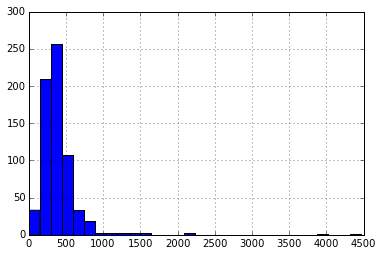

In [21]:
df3["distancePreviousStop"][df3["label"].str.contains("N") == True].hist(bins=30);

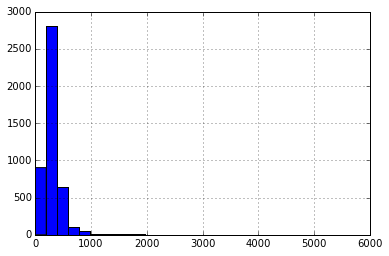

In [22]:
df3["distancePreviousStop"][df3["label"].str.contains("N") == False].hist(bins=30);

In [23]:
df3[df3["distancePreviousStop"] > 3000]["label"].unique()

array([u'A', u'H', u'112', u'125', u'130', u'N20'], dtype=object)

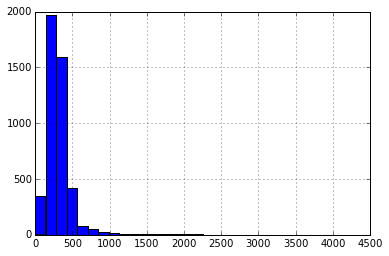

In [24]:
df3["distancePreviousStop"][df3["label"].str.contains("[AHN]") == False].hist(bins=30);

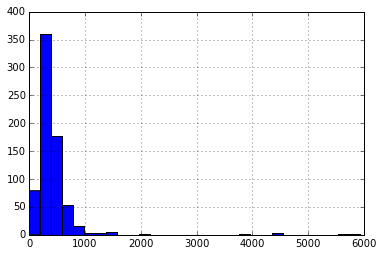

In [25]:
df3["distancePreviousStop"][df3["label"].str.contains("[AHN]")].hist(bins=30);